In [141]:
library(readxl)
library(data.table)
library(ggplot2)
library(ggprism)
library(ggforce)
library(ggetho)
library(ggsignif)
source("R/plot.R")
source("R/Cbind.R")

In [142]:
data <- data.table::fread(file = "tidy_data_wide.csv")
print(table(data$experiment))

wts <- c("Iso31", "MB010B.(II)SPARC-Chrimson ISO", "MB010B.(II)SPARC-GFP ISO")
experiments <- c("20min STM", "20min STM unpaired")
data <- data[experiment %in% experiments,]
data$experiment <- factor(data$experiment, levels=experiments)
panel1_data <- data[Genotype %in% wts,]


                               1hr STM                              20min STM 
                                    22                                    146 
20min STM (2X 3 min ISI, sucrose tube)                     20min STM unpaired 
                                     5                                     73 
                              24hr LTM                           24hr LTM CHX 
                                   171                                     51 
                        24hr LTM GTACR                                3hr STM 
                                    25                                     51 


In [143]:
A <- panel1_data[experiment=="20min STM" & Genotype %in% wts, .(idoc_folder, ROI, Genotype, experiment, PRE, POST)]
B <- panel1_data[experiment=="20min STM unpaired" & Genotype %in% wts,.(idoc_folder, ROI, Genotype, experiment, PRE, POST)]
Ad <- A[, .(delta = POST-PRE)]
Bd <- B[, .(delta = POST-PRE)]

In [165]:
panel1_data[experiment=="20min STM", .N, by=.(User, Genotype)]

User,Genotype,N
<chr>,<chr>,<int>
CH,MB010B.(II)SPARC-Chrimson ISO,56
CH,MB010B.(II)SPARC-GFP ISO,31
ET,Iso31,22
ESB,Iso31,17
AOJ,Iso31,2


In [144]:
data.table::fwrite(x = A, file="prism/Fig1/Figure_1_20min STM.csv", quote=TRUE)
data.table::fwrite(x = B, file="prism/Fig1/Figure_1_20min STM unpaired.csv",  quote=TRUE)
x<- Cbind(Ad, Bd)
colnames(x) <- c("20min STM", "20min STM unpaired")
data.table::fwrite(x=x, file="prism/Fig1/Figure_1_boxplot.csv",  quote=TRUE)

In [156]:
panel1_data_long <- melt(panel1_data[experiment=="20min STM",], measure.vars = c("PRE", "POST"), value.name = "PI", variable.name = "test")
panel1_data_long$test <- factor(panel1_data_long$test, levels=c("PRE", "POST"))

In [157]:
panel1_data[User!="CH", table(User)]

User
AOJ ESB  ET 
  2  17  22 

[1] -1.02  1.00
[1] 0.8


Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 1

$direction
[1] "horizontal"

$annotation
     group__ y_position annotations stars   N test          PI  PI_median
1: 20min STM        0.5     < 0.001   *** 128  PRE  0.02517554  0.0365000
2: 20min STM        0.5     < 0.001   *** 128 POST -0.23740476 -0.2361111
       PI_std   std_error x
1: 0.08522364 0.007532776 1
2: 0.29832253 0.026368235 2


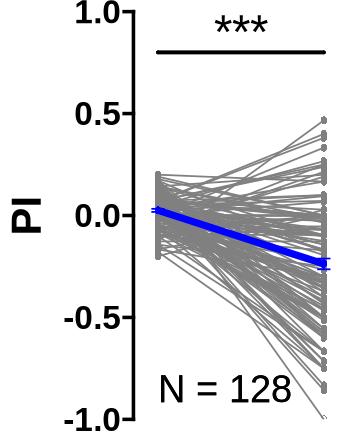

In [161]:
size_unit=3
ratio=1.2
panel1A <- learning_plot(
    panel1_data_long,
    "experiment",
    direction="horizontal",
    starsize=10, textsize=8,
    hjust_text=0,
    y_annotation=0.8,
    colors=colors_panel1[1:length(unique(panel1_data_long$experiment))],
    y_limits=y_limits_panel1
)
save_learning_plot(plot = panel1A, filename = "prism/Fig1/panel1A.svg", size_unit=size_unit, ratio=ratio)
options(repr.plot.height=size_unit*ratio, repr.plot.width=size_unit*panel1A$n_facets)

panel1A

In [92]:
head(panel1_data_long$test)

[1] PRE PRE PRE PRE PRE PRE
Levels: PRE POST

Warning message in `[.data.table`(data, , `:=`(test__, NULL)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in `[.data.table`(data, , `:=`(test__, NULL)):
“Column 'test__' does not exist to remove”


[1] "Outliers: "
     id            group__         PRE       POST        dPI outlier
 1:  28          20min STM  0.07150000 -0.8335000 -0.9050000    TRUE
 2:  61          20min STM -0.17150000  0.5000000  0.6715000    TRUE
 3:  64          20min STM  0.12700000 -0.7500000 -0.8770000    TRUE
 4:  75          20min STM  0.05550000 -0.8570000 -0.9125000    TRUE
 5:  82 20min STM unpaired -0.12700000 -1.0000000 -0.8730000    TRUE
 6:  99 20min STM unpaired -0.10000000  1.0000000  1.1000000    TRUE
 7: 112 20min STM unpaired  0.11100000 -0.4335000 -0.5445000    TRUE
 8: 131 20min STM unpaired -0.10000000  0.7500000  0.8500000    TRUE
 9: 135 20min STM unpaired -0.05550000  0.6665000  0.7220000    TRUE
10: 150 20min STM unpaired  0.05000000 -0.5145000 -0.5645000    TRUE
11: 177          20min STM  0.14300000 -1.0000000 -1.1430000    TRUE
12: 186          20min STM  0.10000000 -1.0000000 -1.1000000    TRUE
13: 493          20min STM -0.12500000  0.4666667  0.5916667    TRUE
14: 500          

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_signif()`).”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


png 
  2

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_signif()`).”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


$gg

$n_facets
[1] 2


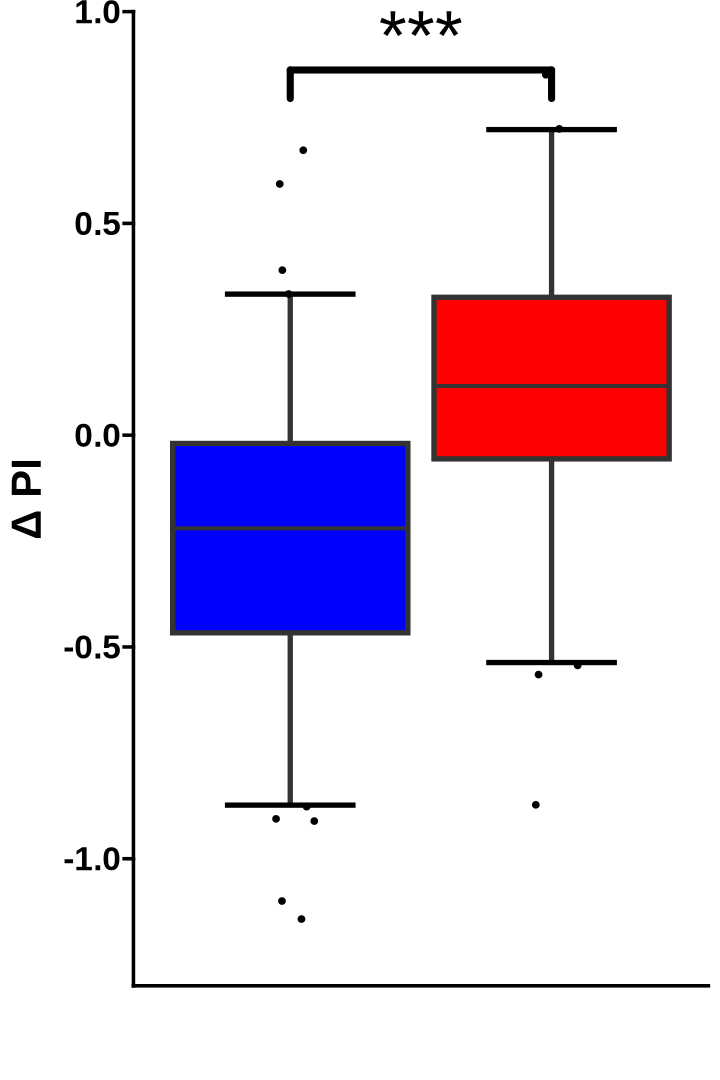

In [93]:
ratio=3
panel1B <- summary_plot(
    panel1_data_long,
    group = "experiment",
    colors=colors_panel1,
    comparisons=list(c("20min STM", "20min STM unpaired")),
    annotation_y=0.75,
    y_limits=c(-1.3, 1),
    text_y_size=20,
    title_y_size=25
)
panel1B$gg <- panel1B$gg + theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) 
save_summ_plot(plot = panel1B, filename = "prism/Fig1/panel1B.svg", size_unit=size_unit, ratio=ratio)
options(repr.plot.height=size_unit*ratio, repr.plot.width=size_unit*panel1B$n_facets)
panel1B

In [47]:
options(repr.plot.width=15)
options(repr.plot.height=10)
gg <- cowplot::plot_grid(panel1A$gg, panel1B$gg, ncol=2)
ggsave(plot = gg, filename = "figures/Figure_1.pdf", width=options()$repr.plot.width, height=options()$repr.plot.height)

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in grid.Call(C_textBounds, as.graphi